In [96]:
import requests
import numpy as np
import pandas as pd
import sklearn.ensemble as sk
import sklearn
import statsmodels.api as sm
import matplotlib.pyplot as plt
%matplotlib inline
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [73]:
train=pd.read_csv('train.csv')
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S


1. Creat three train data subsets: (1) with all features (2) without age (3) without age and Fare
===

In [74]:
train1=train[['PassengerId','Pclass','Sex','Age','SibSp','Fare','Survived']].copy()
train2=train[['PassengerId','Pclass','Sex','SibSp','Fare','Survived']].copy()
train3=train[['PassengerId','Pclass','Sex','SibSp','Survived']].copy()
train1=train1.dropna()
train2=train2.dropna()
train3=train3.dropna()
print train1.shape
print train2.shape
print train3.shape
print train.shape

(714, 7)
(891, 6)
(891, 5)
(891, 12)


In [75]:
sex_dic={'male':0,'female':1}
embarked_dic={'S':0,'C':1,'Q':2}
def rename(df):
    df['Sex']=map(lambda x: sex_dic[x],df['Sex'])
#     df['Embarked']=map(lambda x: embarked_dic[x],df['Embarked'])
    return df
train1=rename(train1)
train2=rename(train2)
train3=rename(train3)

In [76]:
train1.head()

,PassengerId,Pclass,Sex,Age,SibSp,Fare,Survived
0,1,3,0,22,1,7.2500,0
1,2,1,1,38,1,71.2833,1
2,3,3,1,26,0,7.9250,1
3,4,1,1,35,1,53.1000,1
4,5,3,0,35,0,8.0500,0


2. Import test data and split into three subsets: test1,test2,test3
===

In [77]:
test=pd.read_csv('test.csv')
test_sub=test[['PassengerId','Pclass','Sex','Age','SibSp','Fare']].copy()
print test_sub.shape
test_sub.head()

(418, 6)


,PassengerId,Pclass,Sex,Age,SibSp,Fare
0,892,3,male,34.5,0,7.8292
1,893,3,female,47.0,1,7.0000
2,894,2,male,62.0,0,9.6875
3,895,3,male,27.0,0,8.6625
4,896,3,female,22.0,1,12.2875


In [78]:
test1=test_sub
test1=test1.dropna()
test1=rename(test1)
print test1.shape
test1.head()

(331, 6)


/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,PassengerId,Pclass,Sex,Age,SibSp,Fare
0,892,3,0,34.5,0,7.8292
1,893,3,1,47.0,1,7.0000
2,894,2,0,62.0,0,9.6875
3,895,3,0,27.0,0,8.6625
4,896,3,1,22.0,1,12.2875


In [79]:
test_nan=test_sub[test_sub.isnull().any(axis=1)]
test_nan.shape

(87, 6)

In [80]:
test2=test_nan.drop('Age',axis=1)
test2=test2.dropna()
test2=rename(test2)
test2.shape

(86, 5)

In [81]:
test3=test_nan.drop('Age',axis=1)
test3=test3[test3.isnull().any(axis=1)]
test3=rename(test3)
test3=test3.drop('Fare',axis=1)
test3.shape

(1, 4)

In [82]:
print test.shape[0]==test1.shape[0]+test2.shape[0]+test3.shape[0]

True


3. Perform random forest on train data and predict
===

In [83]:
def random_forest_clf(df,n_estimators,oob_score=True):
    clf=sk.RandomForestClassifier(n_estimators=n_estimators,oob_score=oob_score)
    train_data=df[df.columns[1:-1]]
    train_truth=df['Survived']
    model=clf.fit(train_data,train_truth)
    #print clf.oob_score_
    
    fi = enumerate(clf.feature_importances_)
    cols = train_data.columns
    features=pd.DataFrame([(value,cols[i]) for (i,value) in fi if value > 0.0])
    features.columns=['Importance','Feature']
    features=features.sort(['Importance'],ascending=False).reset_index()
    #print features
    
    return clf,clf.oob_score_

In [91]:
def random_forest(df,n_estimators=200,oob_score=True):
    clf=sk.RandomForestClassifier(n_estimators=n_estimators,oob_score=oob_score)
    train_data=df[df.columns[1:-1]]
    train_truth=df['Survived']
    model=clf.fit(train_data,train_truth)
    
    return clf

In [94]:
clf=random_forest(train1)
clf.oob_score_

0.8123249299719888

In [61]:
xlist=np.arange(1,500,10)
ylist=[]
for i in xlist:
    clf=random_forest(sub_train1,)

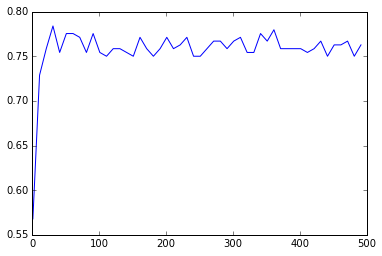

In [64]:
plt.plot(xlist,ylist)
plt.show()

(1) On train1 and test1
==

In [13]:
clf=random_forest(train1)

0.805322128852
   index  Importance Feature
0      2    0.306323     Age
1      4    0.286231    Fare
2      1    0.261424     Sex
3      0    0.099742  Pclass
4      3    0.046280   SibSp


In [14]:
test1['Survived']=clf.predict(test1[test1.columns[1:]])

/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [15]:
test1.head()

,PassengerId,Pclass,Sex,Age,SibSp,Fare,Survived
0,892,3,0,34.5,0,7.8292,0
1,893,3,1,47.0,1,7.0000,0
2,894,2,0,62.0,0,9.6875,1
3,895,3,0,27.0,0,8.6625,1
4,896,3,1,22.0,1,12.2875,0


(2) On train2 and test 2
==

In [16]:
clf=random_forest(train2)

0.812570145903
   index  Importance Feature
0      3    0.493902    Fare
1      1    0.342907     Sex
2      0    0.105733  Pclass
3      2    0.057458   SibSp


In [17]:
test2['Survived']=clf.predict(test2[test2.columns[1:]])

In [18]:
test2.head()

,PassengerId,Pclass,Sex,SibSp,Fare,Survived
10,902,3,0,0,7.8958,0
22,914,1,1,0,31.6833,1
29,921,3,0,2,21.6792,0
33,925,3,1,1,23.4500,0
36,928,3,1,0,8.0500,0


(3) On train3 and test3
===

In [19]:
clf=random_forest(train3)

0.784511784512
   index  Importance Feature
0      1    0.665152     Sex
1      0    0.245603  Pclass
2      2    0.089245   SibSp


In [20]:
test3['Survived']=clf.predict(test3[test3.columns[1:]])

In [21]:
test3.head()

,PassengerId,Pclass,Sex,SibSp,Survived
152,1044,3,0,0,0


(4) Combine results
===

In [22]:
result1=test1[['PassengerId','Survived']].copy()
result2=test2[['PassengerId','Survived']].copy()
result3=test3[['PassengerId','Survived']].copy()
frames=[result1,result2,result3]
results=pd.concat(frames)

In [23]:
results.shape

(418, 2)

In [24]:
results.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,1
3,895,1
4,896,0


In [25]:
results.to_csv('random_forest_result_drop.csv',header=True,index=False)